In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [288]:
bangalore_data = pd.read_csv('homeprices_banglore.csv')
bangalore_data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [289]:
X = bangalore_data.drop('price', axis = 1)
y = bangalore_data['price']
print(X.shape)

(20, 2)


In [290]:
X_array = np.array(X)
y_array = np.array(y)

In [291]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_array)
y_scaled = scaler_y.fit_transform(y_array.reshape(-1, 1))

y_scaled = y_scaled.reshape(-1,)
print(y_scaled)

[0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]


In [292]:
def batch_gradient_descent(X, y, epochs, learning_rate):
    
    epoch_list = []
    cost_list = []
    
    w = np.ones(shape = X.shape[1])
    bias = 0
    sample_len = X.shape[0]

    for i in range(epochs):
        y_preds = np.dot(w, X.T) + bias
        w_partial = X.shape[1]/sample_len * (np.dot(X.T,(y_preds - y)))
        bias_partial = X.shape[1]/sample_len * np.sum(y_preds - y)
        
        w = w - learning_rate * w_partial
        bias = bias - learning_rate * bias_partial
        cost = np.mean(1/sample_len*np.square(y - y_preds))

        epoch_list.append(i + 1)
        cost_list.append(cost)
    
    return w, bias, epoch_list, cost_list

In [293]:
batch_w, batch_bias, epoch_list_batch, cost_list_batch = batch_gradient_descent(X_scaled, y_scaled, epochs=500, learning_rate=0.01)

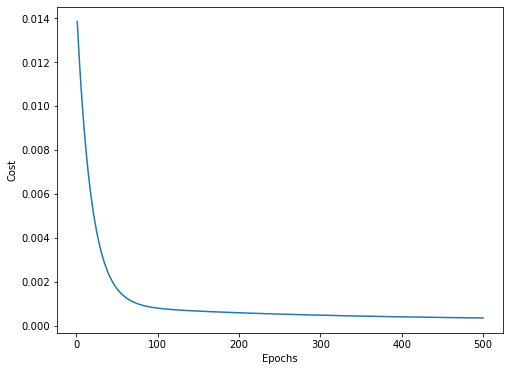

In [294]:
plt.figure(figsize= (8, 6))
plt.plot(epoch_list_batch, cost_list_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

# Stochastic gradient descent

In [295]:
def stochastic_gradient_descent(X, y, epochs, learning_rate):
    w = np.ones(X.shape[1])
    bias = 0
    sample_len = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_n = random.randrange(0, X.shape[0] - 1)
        previous_y_preds = np.dot(w, X[random_n].T) + bias
        
        partial_w = X.shape[1]/sample_len * np.dot(X[random_n].T,(previous_y_preds - y[random_n]))
        partial_bias = X.shape[1]/sample_len * np.sum(previous_y_preds - y)

        w = w - learning_rate * partial_w
        bias = bias - learning_rate * partial_bias

        new_y_preds = np.dot(w, X[random_n].T) + bias

        cost = np.square(y[random_n] - new_y_preds) # Calculated the cost using MSE (Mean squared error)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost_list, epoch_list          

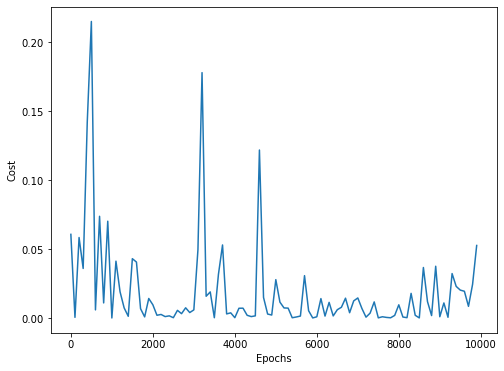

In [296]:
w_stoch, bias_stoch, cost_list_stoch, epoch_list_stoch = stochastic_gradient_descent(X_scaled, y_scaled, epochs = 10000, learning_rate = 0.01)

plt.figure(figsize= (8, 6))
plt.plot(epoch_list_stoch, cost_list_stoch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

# Mini batch gradient Descent

In [297]:
def mini_batch_gradient_descent(X, y, epochs, learning_rate, batch_size):
    w = np.ones(X.shape[1])
    bias = 0
    sample_len = X.shape[0]

    cost_list = []
    epoch_list = []

    n_batches = int(sample_len / batch_size)

    for i in range(epochs):
        random_n = np.random.permutation(sample_len)
        X_random = X[random_n]
        y_random = y[random_n]

        for j in range(0, sample_len, batch_size):
            X_sub = X_random[j:j+batch_size]
            y_sub = y_random[j:j+batch_size]

            y_preds = np.dot(w, X_sub.T) + bias
            
            partial_w = X.shape[1]/len(X_sub) * np.dot(X_sub.T,(y_preds - y_sub))
            partial_bias = X.shape[1]/len(X_sub) * np.sum(y_preds - y_sub)

            w = w - learning_rate * partial_w
            bias = bias - learning_rate * partial_bias

            cost = np.mean(np.square(y_sub - y_preds)) # Calculated the cost using MSE (Mean squared error)

            # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost_list, epoch_list     

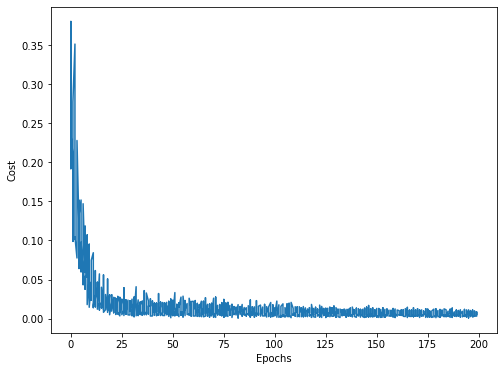

In [298]:
w_mini, bias_mini, cost_list_mini, epoch_list_mini = mini_batch_gradient_descent(X_scaled, y_scaled, epochs = 200, learning_rate = 0.01, batch_size=5)

plt.figure(figsize= (8, 6))
plt.plot(epoch_list_mini, cost_list_mini)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [299]:
def batch_predict_price(X, w, b):
    X_scaled = scaler_X.transform(X)
    predictions = np.dot(X_scaled, w) + b
    
    return scaler_y.inverse_transform(predictions.reshape(-1, 1))

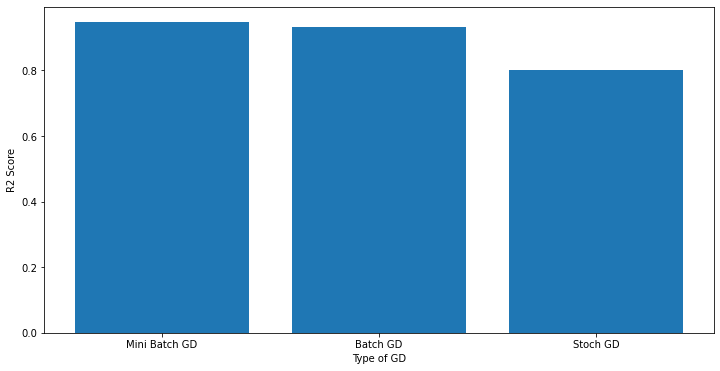

In [308]:
from sklearn.metrics import r2_score

mini_batch_r2 = r2_score(y_array, batch_predict_price(X_array, w_mini, bias_mini))
batch_r2 = r2_score(y_array, batch_predict_price(X_array, batch_w, batch_bias))
stoch_r2 = r2_score(y_array, batch_predict_price(X_array, w_stoch, bias_stoch))

plt.figure(figsize= (12, 6))
plt.bar(['Mini Batch GD', 'Batch GD', 'Stoch GD'], [mini_batch_mse, batch_mse, stoch_mse])
plt.xlabel('Type of GD')
plt.ylabel('R2 Score')
plt.show()